In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
import statsmodels.api as sm
from matplotlib_venn import venn3
from sklearn.decomposition import PCA

In [2]:
tsr=pd.read_pickle('common_data/fivepseq_abundance_tsr.pkl')
print(f'All TSRs: {tsr.shape[0]}')
print(f'   Unique genes represented: {tsr.Gene_Name.unique().shape[0]}')
print(f'   Unique protein-coding genes represented: {tsr[tsr.Gene_Type=="protein-coding"].Gene_Name.unique().shape[0]}')

All TSRs: 52033
   Unique genes represented: 16117
   Unique protein-coding genes represented: 13322


In [3]:
tpm_lo=['pt212_lo_TPM','pt221_lo_TPM','pt226_lo_TPM','pt87_lo_TPM','pt214_lo_TPM']
tpm_hi=['pt212_hi_TPM','pt221_hi_TPM','pt226_hi_TPM','pt87_hi_TPM','pt214_hi_TPM']
tpm=np.hstack((tpm_hi,tpm_lo))

**Figure 1D**

Generated using CAGEr's "plotReverseCumulatives" function, please see "Call_CTSS_Batch_Correct.R" for implementation. 

**Figure 1E**

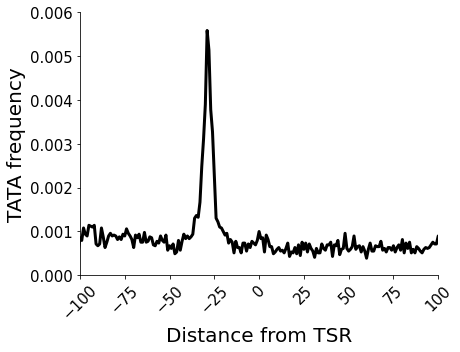

In [4]:
TATA=pd.read_csv('Figure1_data/Homer_TATA.txt',sep='\t')
TATA.columns=np.hstack(('Distance',TATA.columns[1:]))
plt.figure(figsize=(6.5,5))
plt.plot(TATA.Distance,TATA['TATA-Box(TBP)/Promoter/Homer total sites'],'k',lw=3)
plt.ylim([0,0.006])
plt.xlim([-100,100])
plt.ylabel('TATA frequency',fontsize=20)
plt.xlabel('Distance from TSR',fontsize=20)
plt.xticks(fontsize=15,rotation=45)
plt.yticks(fontsize=15)
sns.despine()
plt.tight_layout()
plt.savefig('Panels/Figure1E.pdf',transparent=True,dpi=500)
plt.show()
plt.close()

**Figure 1F**

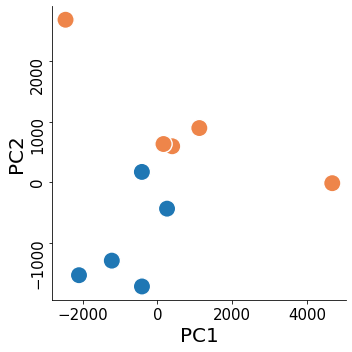

In [5]:
pca = PCA(n_components=2)
pca.fit(tsr[tpm].T)
X=pd.DataFrame(pca.transform(tsr[tpm].T),columns=['x','y'])
X['Label']=np.hstack((['High']*5,['Low']*5))
plt.figure(figsize=(5,5))
sns.scatterplot(x='x',y='y',hue='Label',data=X,s=300,palette=[sns.color_palette('muted')[1],sns.color_palette()[0]])
plt.legend('',frameon=False)
sns.despine()
plt.xticks([-2000,0,2000,4000],fontsize=15)
plt.yticks(rotation=90,fontsize=15)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.tight_layout()
plt.savefig('Panels/Figure1F.pdf',transparent=True,dpi=500)
plt.show()
plt.close()